In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Import Data
path = r'/Users/azadeh/Documents/Instacart Basket Analysis'

In [5]:
# Import orders_products__customers_merged_flags
df_merged =  pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_products_customers_merge.pkl'))

# histogram of the “order_hour_of_day” column

<Axes: ylabel='Frequency'>

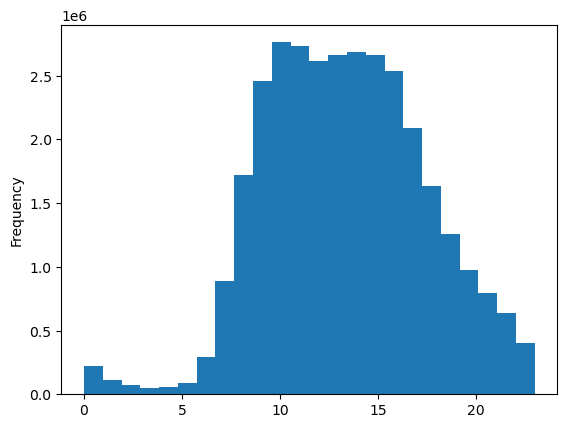

In [4]:
# create  Price histogram
df_merged['order_hour_of_day'].plot.hist(bins = 24)


This pattern indicates that orders are most common 10am-4pm.

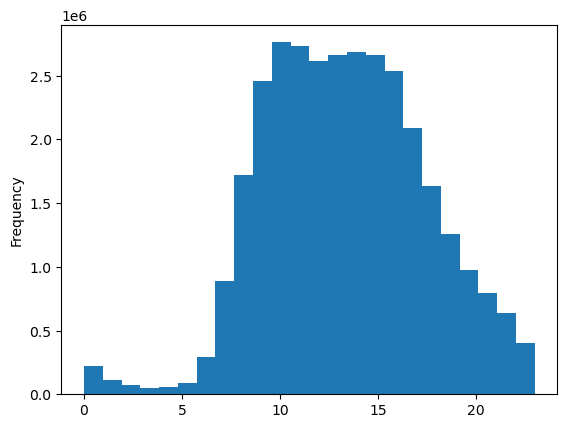

In [5]:
#exporting histogram
hist_order_hour_of_day = df_merged['order_hour_of_day'].plot.hist(bins = 24)
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis',  'Visualizations', 'hist_order_hour_of_day.png'))

# bar chart from the “loyalty_flag” column

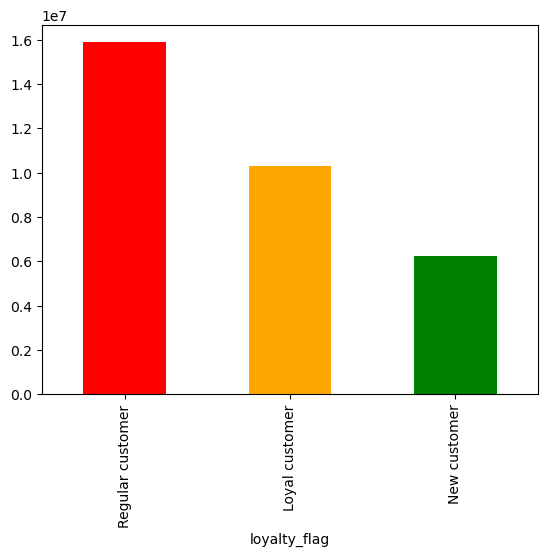

In [6]:
#Creating Bar Charts for loyalty_flag 
bar_loyalty_flag = df_merged['loyalty_flag'].value_counts().plot.bar(color =['red','orange','green'])

In [7]:
#exporting the bar chart
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','bar_loyalty_flag.png'))

# Line chart from "hour of the day" and "prices"

In [8]:
# creat subset
df = df_merged[:2000000]

In [9]:
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [10]:
#create a list holding true/false to the test np.random.rant() <= 0.7
dev = np.random.rand(len(df_merged)) <= 0.7

In [11]:
#store 70% of the sample in the dataframe big
big = df_merged[dev]

In [12]:
#store 30% of the sample in the dataframe small
small = df_merged[~dev]

In [13]:
#count the number of rows
len(big)+ len(small)

32404859

In [14]:
df_merged.shape

(32404859, 35)

In [15]:
df_merged.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days since the last order,product_id,add_to_cart_order,reordered,...,order_frequency_flag,first_name,surname,gender,state,age,date_joined,dependent_count,fam_status,income
0,0,2539329,1,1,2,8,NaN,196,1,0,...,Non-frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,1,2398795,1,2,3,7,15.0,196,1,1,...,Non-frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2,473747,1,3,3,12,21.0,196,1,1,...,Non-frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,3,2254736,1,4,4,7,29.0,196,1,1,...,Non-frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,4,431534,1,5,4,15,28.0,196,1,1,...,Non-frequent,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [16]:
df_2 = small[['order_hour_of_day','prices']]

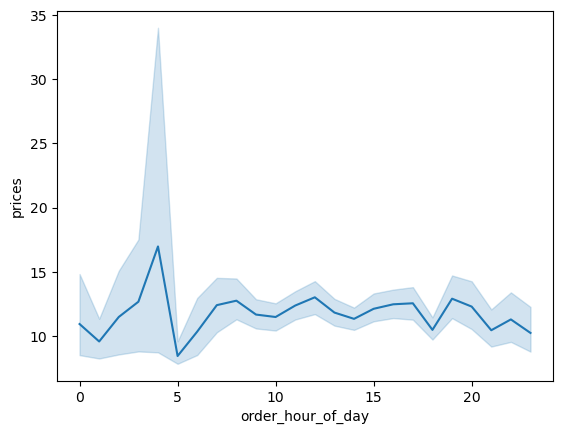

In [17]:
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

# Line chart from "age" and "dependent_count"

In [18]:
# Group the data by 'age' and calculate the mean number of dependents for each age group
df_3 = small[['age', 'dependent_count']]

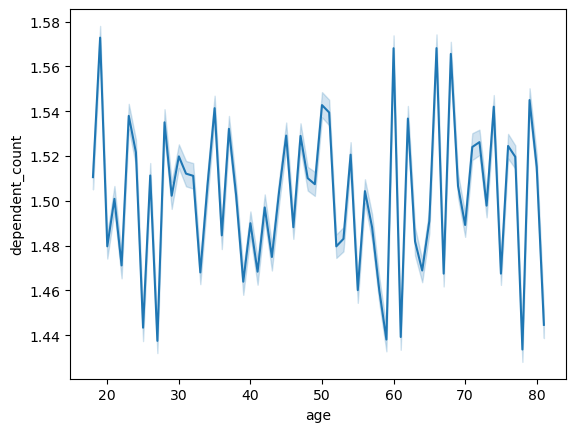

In [19]:
line_age_dependent = sns.lineplot(data = df_3, x = 'age',y = 'dependent_count')

Examining this line chart reveals no apparent relationship between age and the number of dependents.

In [20]:
#exporting line_age_dependent
line_age_dependent.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependent_count.png'))

# Scatterplot from age and spending power (income)

<Axes: xlabel='age', ylabel='income'>

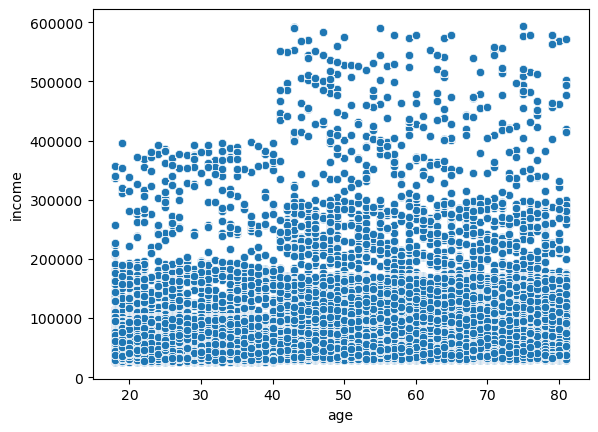

In [6]:
#create scatterplot to look at spending power
sns.scatterplot(x = 'age', y = 'income',data = df_merged)

The scatterplot shows that most people earn less than 200,000 regardless of age.After turning 40, incomes tend to rise, ranging from 400,000 to 600,000. This suggests a correlation between age and income.

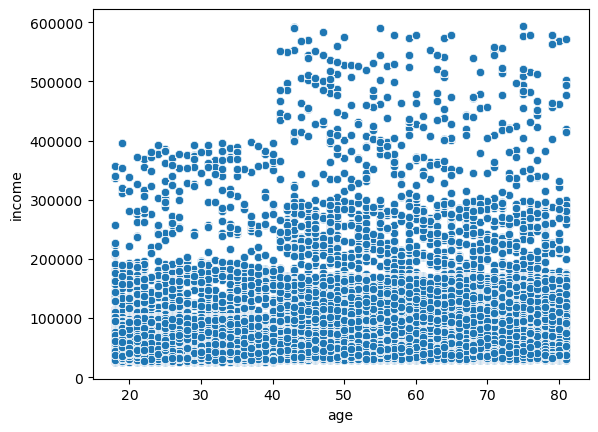

In [7]:
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income',data = df_merged)

In [9]:
#exporting scatterplot_age_income
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_age_income.png'))